In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('C:\\Users\\Akshat.Dubey.000\\Downloads\\iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [10]:
final_df = df[df['Species'] != 'Iris-virginica']

In [11]:
final_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

# Label Encoding

In [13]:
final_df['Species'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

C:\Users\Akshat.Dubey.000\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [35]:
final_df=final_df.drop(df.columns[0],axis=1)
final_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [46]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [47]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

C:\Users\Akshat.Dubey.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat.Dubey.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [48]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (80, 4)
Output Shape (20, 4)


In [49]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [50]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [51]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [52]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [53]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [54]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.14023166  0.12569071 -0.18273797 -0.1819222 ]]
Optimized intercept -0.009695002888007936
Training Accuracy 1.0
Test Accuracy 1.0


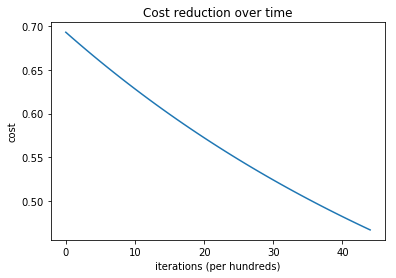

In [29]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression()

In [57]:
clf.fit(X_tr_arr, y_tr_arr)

C:\Users\Akshat.Dubey.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akshat.Dubey.000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
print (clf.intercept_, clf.coef_)

[-0.16466945] [[-0.80014519  1.10380301 -1.4616183  -1.48917552]]


In [59]:
pred = clf.predict(X_ts_arr)

In [60]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0
